In [48]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [49]:
datos, metadatos = tfds.load("mnist", as_supervised=True, with_info=True)

In [50]:
metadatos

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='C:\\Users\\under\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

In [51]:
datosEntrenamiento = datos["train"]
datosPruebas = datos["test"]

In [52]:
nombre_clases = metadatos.features["label"].names
nombre_clases

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [53]:
# Normalización de los datos.

def normalizar(imagenes, etiquetas):
    imagenes = tf.cast(imagenes, tf.float32)
    imagenes = imagenes / 255
    return imagenes, etiquetas

datosEntrenamiento = datosEntrenamiento.map(normalizar)
datosPruebas = datosPruebas.map(normalizar)

# agregar cache
datosEntrenamiento = datosEntrenamiento.cache()
datosPruebas = datosPruebas.cache()


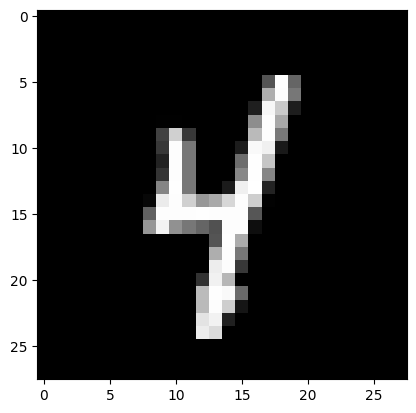

In [54]:
for imagen, etiqueta in datosEntrenamiento.take(1):
    break
    
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(imagen, cmap="gray")
plt.show()

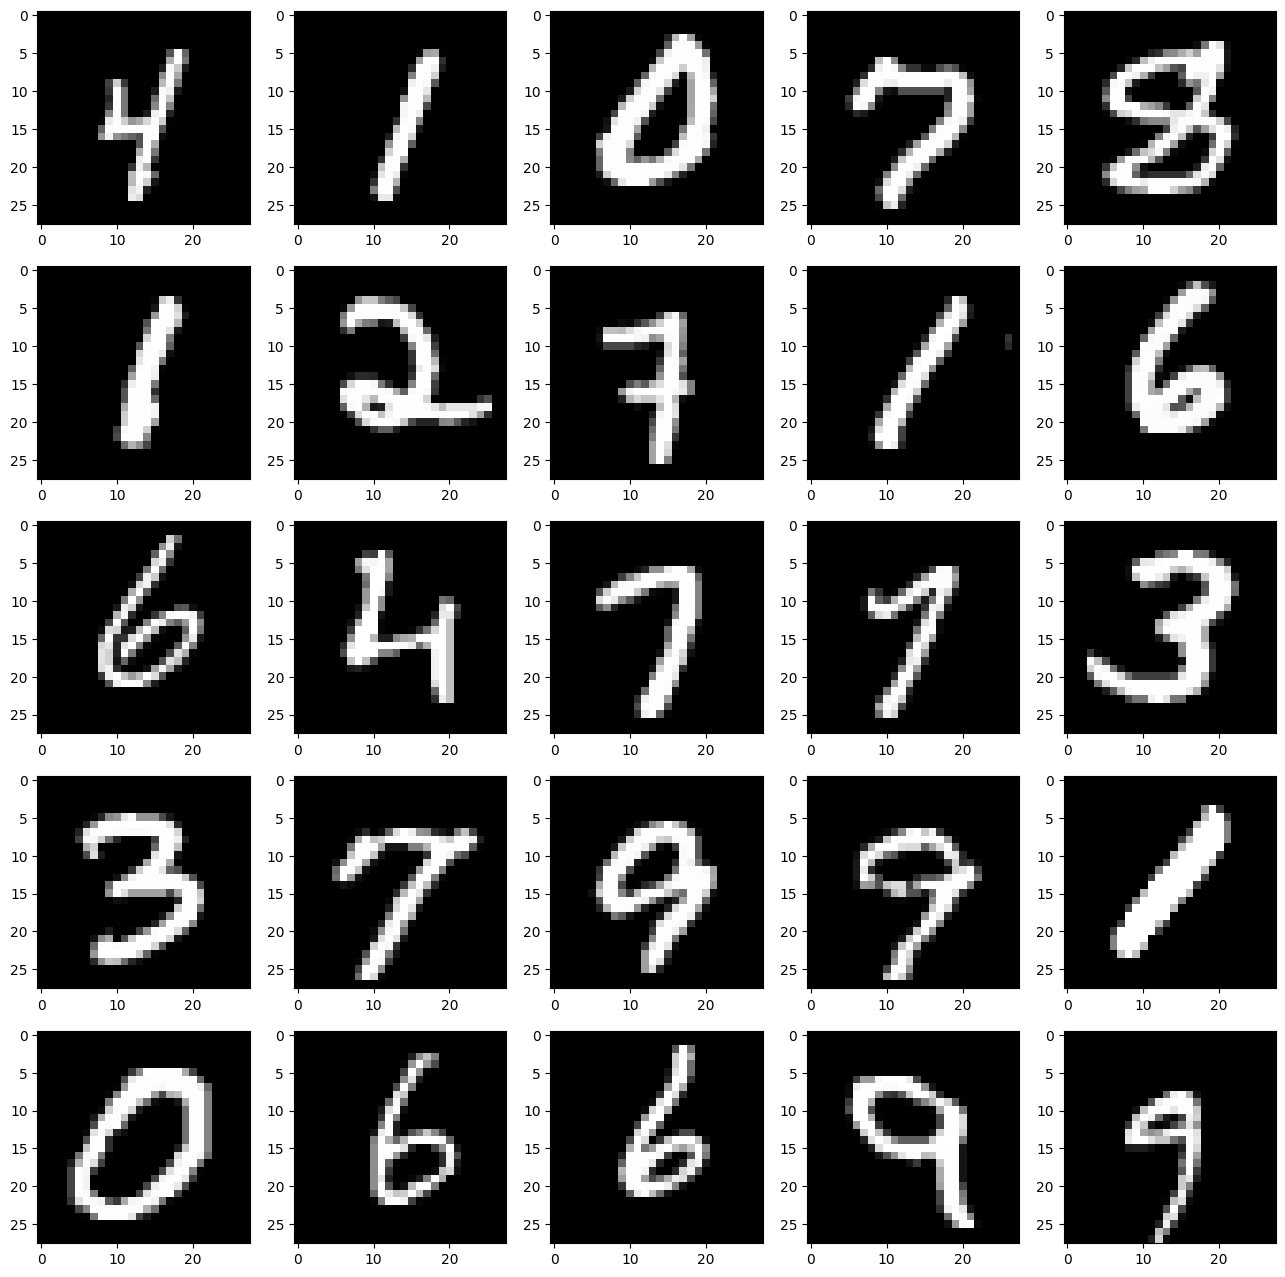

In [55]:
plt.figure(figsize=(16,16))
for i, (imagen, etiqueta) in enumerate(datosEntrenamiento.take(25)):
    plt.subplot(5,5, i+1)
    plt.imshow(imagen, cmap="gray")
plt.show()    

